<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## Seyed Mohammad Ojagh Kazazi
## student number: 400100554

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [1]:
# import required packages
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import csv

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

import matplotlib.pyplot as plt
import random

least square car model for k= 3  :  [ 5.49696299e+01  3.53141996e+02 -1.01953170e+03  8.72210302e+04]
least square bus model for k= 3  :  [-3.17010029e-01  1.29352344e+02 -2.23543348e+03  2.58921105e+04]
least square car model for k= 4  :  [ 5.96145143e-01 -1.77600774e+01  3.36171620e+03 -4.92289377e+04
  3.26411698e+05]
least square bus model for k= 4  :  [-1.39837861e-01  1.67432090e+01 -5.76369385e+02  9.07305454e+03
 -3.02148825e+04]
least square car model for k= 5  :  [ 2.35836077e-01 -3.53688566e+01  2.01278854e+03 -4.86077113e+04
  5.37216818e+05 -1.92933376e+06]
least square bus model for k= 5  :  [-1.15574617e-02  1.62267505e+00 -8.27665364e+01  1.97046177e+03
 -1.96665024e+04  8.03309344e+04]


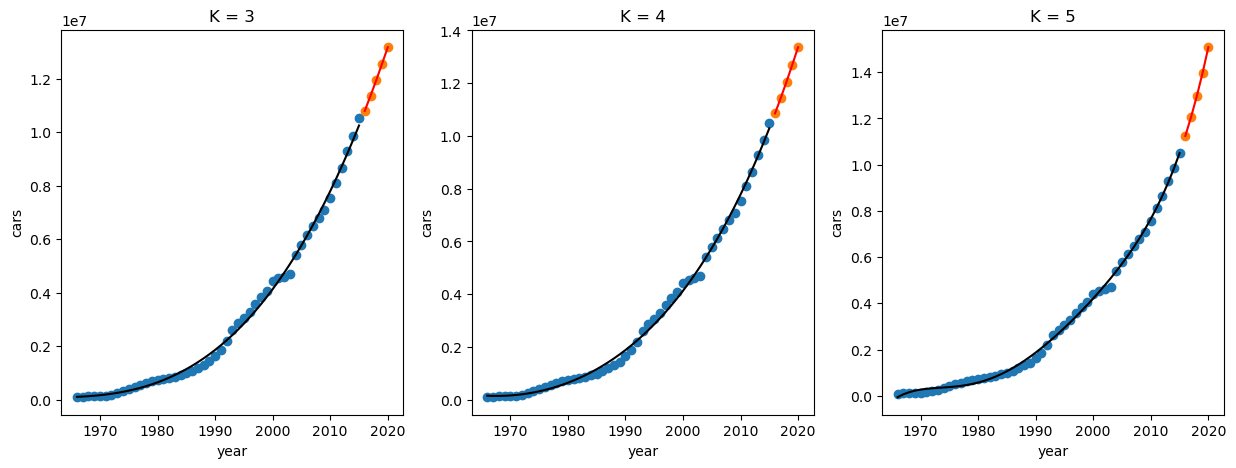

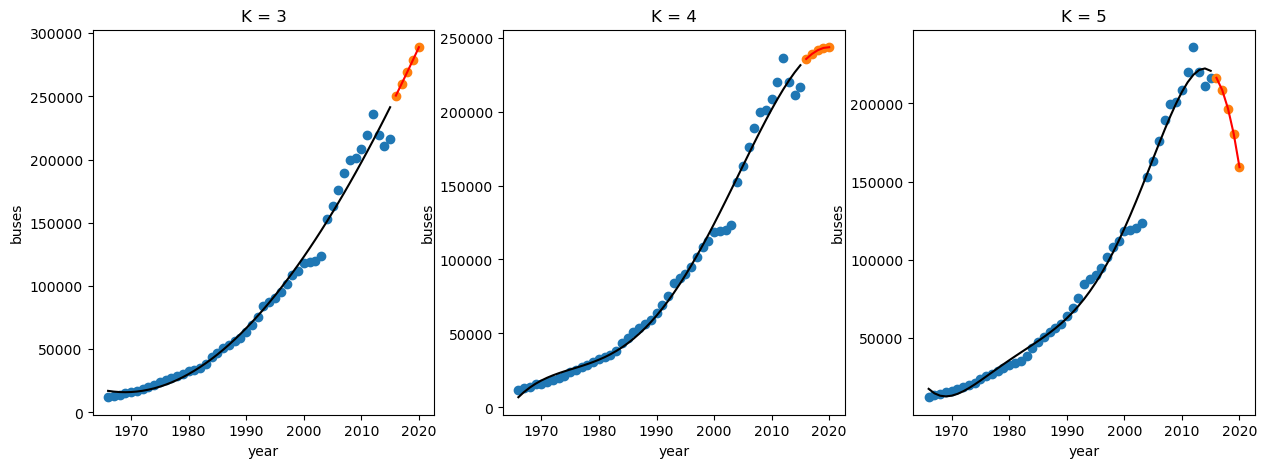

Predictions for number of "Cars" made respectively for 2016 , 2017 , 2018 , 2019 , 2020 : 
for k = 3 :  [10791127.0869518  11356456.7467868  11941292.30405491 12545963.5765358
 13170800.38200913] 

for k = 4 :  [10855766.45751084 11446444.89011412 12061016.50774502 12700197.43023556
 13364718.08490117] 

for k = 5 :  [11246441.38424203 12066928.59727533 12973180.59006762 13975252.59108911
 15083992.39534762] 

Predictions for number of "Buses" made respectively for 2016 , 2017 , 2018 , 2019 , 2020 : 
for k = 3 :  [250684.75354755 260030.12990447 269525.79351961 279169.84233278
 288960.3742838 ] 

for k = 4 :  [235522.28614047 238921.59684756 241442.06806577 242991.18280123
 243473.06795139] 

for k = 5 :  [216376.7399207  208513.96461617 196740.2497427  180505.40282264
 159217.73564601] 



In [132]:
# Code cell
df = pd.read_csv("arac.csv" ,sep=";")

years = np.array(df['Year'])
years = np.subtract(years , 1960)
cars = np.array(df['Car'])
buses = np.array(df['Bus'])

#D = G*M where M is array of outputs and G is matrix of coefficient
X = np.linspace(2016 , 2020 , num = 5)
X1 = np.subtract(X , 1960)


#for k = 3 : 
#y = ax^3 + bx^2 + cx + d 
G3 = np.stack([np.power(years , 3) , np.power(years , 2) , years , np.ones(years.shape) ]).T

mhat3_car , residuals3_car , rank3_car , s3_car = np.linalg.lstsq(G3 , cars , rcond=None)

mhat3_bus , residuals3_bus , rank3_bus , s3_bus = np.linalg.lstsq(G3 , buses , rcond=None)


print("least square car model for k= 3  : ", mhat3_car) # this is our Coefficient vector for cars model 
print("least square bus model for k= 3  : ", mhat3_bus) # this is our Coefficient vector for bus model 


Gpred3 = np.stack([np.power(years , 3) , np.power(years , 2) , years , np.ones(years.shape) ]).T
Ypred3_car = np.dot(Gpred3,mhat3_car)
Ypred3_bus = np.dot(Gpred3,mhat3_bus)

# now we calculate new datas from our training one 
Gpred3_new = np.stack([np.power(X1 , 3) , np.power(X1 , 2) , X1 , np.ones(X1.shape) ]).T
Ypred3_car_new = np.dot(Gpred3_new,mhat3_car)
Ypred3_bus_new = np.dot(Gpred3_new,mhat3_bus)







#for k = 4 : 

#y = ax^4 + bx^3 + cx^2 + dx + e  
G4 = np.stack([np.power(years , 4) , np.power(years , 3) , np.power(years , 2) , years , np.ones(years.shape) ]).T

mhat4_car , residuals4_car , rank4_car , s4_car = np.linalg.lstsq(G4 , cars , rcond=None)

mhat4_bus , residuals4_bus , rank4_bus , s4_bus = np.linalg.lstsq(G4 , buses , rcond=None)


print("least square car model for k= 4  : ", mhat4_car) # this is our Coefficient vector for cars model 
print("least square bus model for k= 4  : ", mhat4_bus) # this is our Coefficient vector for bus model 


Gpred4 = np.stack([np.power(years , 4) , np.power(years , 3) , np.power(years , 2) , years , np.ones(years.shape) ]).T
Ypred4_car = np.dot(Gpred4,mhat4_car)
Ypred4_bus = np.dot(Gpred4,mhat4_bus)

# now we calculate new datas from our training one 
Gpred4_new = np.stack([np.power(X1 , 4) , np.power(X1 , 3) , np.power(X1 , 2) , X1 , np.ones(X1.shape) ]).T
Ypred4_car_new = np.dot(Gpred4_new,mhat4_car)
Ypred4_bus_new = np.dot(Gpred4_new,mhat4_bus)






#for k = 5 : 

#y = ax^5 + bx^4 + cx^3 + dx^2 + ex + f  
G5 = np.stack([np.power(years , 5) , np.power(years , 4) , np.power(years , 3) , np.power(years , 2) , years , np.ones(years.shape) ]).T

mhat5_car , residuals5_car , rank5_car , s5_car = np.linalg.lstsq(G5 , cars , rcond=None)

mhat5_bus , residuals5_bus , rank5_bus , s5_bus = np.linalg.lstsq(G5 , buses , rcond=None)


print("least square car model for k= 5  : ", mhat5_car) # this is our Coefficient vector for cars model 
print("least square bus model for k= 5  : ", mhat5_bus) # this is our Coefficient vector for bus model 


Gpred5 = np.stack([np.power(years , 5) , np.power(years , 4) , np.power(years , 3) , np.power(years , 2) , years , np.ones(years.shape) ]).T
Ypred5_car = np.dot(Gpred5,mhat5_car)
Ypred5_bus = np.dot(Gpred5,mhat5_bus)


# now we calculate new datas from our training one 
Gpred5_new = np.stack([np.power(X1 , 5) , np.power(X1 , 4) , np.power(X1 , 3) , np.power(X1 , 2) , X1 , np.ones(X1.shape) ]).T
Ypred5_car_new = np.dot(Gpred5_new,mhat5_car)
Ypred5_bus_new = np.dot(Gpred5_new,mhat5_bus)





fig = plt.subplots(1, 3, figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.scatter( np.array(df['Year']) , np.array(df['Car']))
plt.scatter( X , Ypred3_car_new )
plt.plot(np.array(df['Year']) , Ypred3_car , '-k')
plt.plot(X , Ypred3_car_new , '-r')
plt.xlabel("year")
plt.ylabel("cars")
plt.title("K = 3")
#plt.show()


plt.subplot(1, 3, 2)
plt.scatter( np.array(df['Year']) , np.array(df['Car']))
plt.scatter( X , Ypred4_car_new )
plt.plot(np.array(df['Year']) , Ypred4_car , '-k')
plt.plot(X , Ypred4_car_new , '-r')
plt.xlabel("year")
plt.ylabel("cars")
plt.title("K = 4")
#plt.show()



plt.subplot(1, 3, 3)
plt.scatter( np.array(df['Year']) , np.array(df['Car']))
plt.scatter( X , Ypred5_car_new )
plt.plot(np.array(df['Year']) , Ypred5_car , '-k')
plt.plot(X , Ypred5_car_new , '-r')
plt.xlabel("year")
plt.ylabel("cars")
plt.title("K = 5")
plt.show()





fig = plt.subplots(1, 3, figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.scatter( np.array(df['Year']) , np.array(df['Bus']))
plt.scatter( X , Ypred3_bus_new )
plt.plot(np.array(df['Year']) , Ypred3_bus , '-k')
plt.plot(X , Ypred3_bus_new , '-r')
plt.xlabel("year")
plt.ylabel("buses")
plt.title("K = 3")
#plt.show()



plt.subplot(1, 3, 2)
plt.scatter( np.array(df['Year']) , np.array(df['Bus']))
plt.scatter( X , Ypred4_bus_new )
plt.plot(np.array(df['Year']) , Ypred4_bus , '-k')
plt.plot(X , Ypred4_bus_new , '-r')
plt.xlabel("year")
plt.ylabel("buses")
plt.title("K = 4")
#plt.show()


plt.subplot(1, 3, 3)
plt.scatter( np.array(df['Year']) , np.array(df['Bus']))
plt.scatter( X , Ypred5_bus_new)
plt.plot(np.array(df['Year']) , Ypred5_bus , '-k')
plt.plot(X , Ypred5_bus_new , '-r')
plt.xlabel("year")
plt.ylabel("buses")
plt.title("K = 5")
plt.show()


#plt.subplots_adjust(left=0, right=1, bottom=0.5, top=1, wspace=1, hspace=1)

#plt.show()


print("Predictions for number of \"Cars\" made respectively for 2016 , 2017 , 2018 , 2019 , 2020 : ")
print ("for k = 3 : " , Ypred3_car_new , "\n")
print ("for k = 4 : " , Ypred4_car_new , "\n")
print ("for k = 5 : " , Ypred5_car_new , "\n")

print("Predictions for number of \"Buses\" made respectively for 2016 , 2017 , 2018 , 2019 , 2020 : ")
print ("for k = 3 : " , Ypred3_bus_new , "\n")
print ("for k = 4 : " , Ypred4_bus_new , "\n")
print ("for k = 5 : " , Ypred5_bus_new , "\n")


## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

[[ 3.69959867  3.89235252]
 [ 2.6413343   2.97095728]
 [-1.66329434  3.35560306]
 ...
 [ 0.5785215   0.34965446]
 [ 2.6710785   2.30721969]
 [-1.04525337  1.21114529]]
(600, 2)


/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


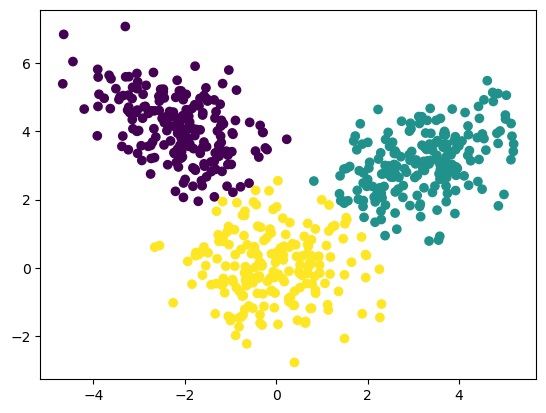

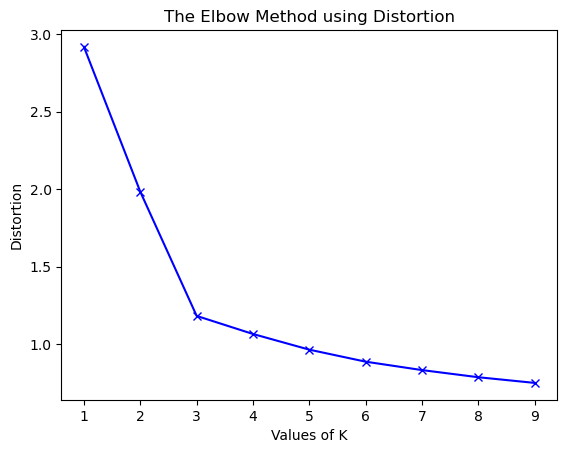

In [2]:
def load_data(file_name):
    all_data = []
    with open(file_name , 'r') as f:
        reader = csv.reader(f , delimiter='t')
        for i, line in enumerate(reader):
            x,y = line[0].split(",")
            x , y = float(x) , float(y)
            all_data.append([x,y])
    
            
    X = np.array(all_data)
    return X

data = load_data("image.csv")
print(data)
print(data.shape)
x , y = [] , []
for i in data : 
    x.append(i[0])
    y.append(i[1])
    

#this is for testing final Answer 

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
plt.scatter(x,y , c=kmeans.labels_)
plt.show()


distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K1 = range(1, 10)
 
for k in K1:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, n_init=10)
    kmeanModel.fit(data)
 
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / data.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
    

plt.plot(K1, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [3]:
#these are our Auxiliary functions
def initiate_centroids(k, X): #we use this function for make random initial centers for begin the process
    centers = []
    for i in range(k) : 
        temp = random.randint(1,599)
        centers.append(list(X[temp , :]))
        
    return np.array(centers)


def findErrorTwoPoint(a,b): #we use this function for find distance between two points
    return np.sqrt(np.sum((a-b)**2)) 


#we use this function for make U and to find out which cluster each point is in

def nearestClusters(X , k , centers) : 
    n,d = X.shape 
    LSE = []
    clusters = []
    for i in range(n) : 
        min_error = np.inf
        cluser = 0
        for j in range(k) :
            err = findErrorTwoPoint(centers[j,:], data[i,:])
            if err < min_error : 
                min_error = err 
                cluser = j
        
        LSE.append(min_error)
        clusters.append(cluser)
        
    
    return LSE , clusters



In [4]:
def kmeans(X, K):
    
    M = initiate_centroids(K , X)
    
    update_count = 20
    for _ in range(update_count):
        LSE , U = nearestClusters(X , K , M)
        U = np.array(U)
        
        # Updating centroids by the mean of the assigned data points
        M_new = np.array([X[U == k].mean(axis=0) for k in range(K)])
        # Convergence
        if np.allclose(M, M_new):
            break

        M = M_new

    
    return M , U

M , U = kmeans(data , 3)
print(M)
print(U)


[[ 3.18586944  3.06155446]
 [-2.13711914  4.12519435]
 [-0.07057305  0.02795606]]
[0 0 1 1 2 1 1 1 1 1 2 2 1 0 1 2 2 2 2 0 1 2 1 2 2 2 1 0 1 1 1 1 2 0 2 1 1
 1 2 1 2 1 2 1 0 1 0 2 0 1 0 1 1 0 1 2 1 0 0 2 1 0 2 0 1 2 2 1 1 0 2 1 0 0
 0 0 1 0 0 2 0 0 0 0 2 1 1 2 1 0 1 1 2 1 2 0 2 0 1 2 0 1 0 2 1 2 1 0 0 1 2
 0 2 0 1 0 1 1 0 1 0 2 2 0 1 0 1 1 0 1 2 2 1 0 0 2 2 2 0 1 0 0 0 1 2 2 1 0
 0 2 0 1 1 2 2 1 2 2 1 1 2 0 1 1 2 1 0 2 0 1 1 1 1 1 0 2 1 1 0 0 2 2 1 2 0
 1 2 2 2 1 2 0 1 1 2 2 1 1 1 0 2 0 0 2 1 2 2 2 0 0 1 0 2 2 2 0 1 2 0 0 2 0
 2 1 2 1 0 2 0 2 1 2 0 0 2 0 1 1 2 1 0 0 0 2 2 1 1 1 2 2 2 2 2 2 1 2 2 0 1
 2 1 0 0 2 1 2 2 1 1 0 0 0 0 2 1 1 2 1 0 0 2 0 0 0 1 2 1 1 2 2 2 1 2 1 0 1
 0 2 1 2 1 0 1 0 1 2 0 1 2 1 2 2 1 1 0 1 2 0 2 2 1 2 1 0 1 2 0 1 0 1 2 2 2
 2 0 0 2 2 1 2 0 0 2 0 1 0 0 1 2 0 1 0 2 2 0 2 2 1 2 0 0 0 0 2 1 0 2 0 2 2
 0 2 0 1 1 0 0 0 0 1 2 0 2 0 2 2 0 2 2 0 1 2 2 0 0 1 1 1 1 1 0 2 2 0 0 2 0
 2 1 0 0 2 0 2 2 1 1 1 2 0 1 1 2 0 0 0 0 2 2 0 0 2 0 1 0 1 0 0 0 1 0 0 1 2
 2 0 2 2 2 2 2 2 2

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

**<font color="red"> Don't edit the code in the following cell!</font>**

In [5]:
from matplotlib.patches import Circle

In [6]:
def plot_clusters(X, M, U):
    K = M.shape[0]
            
    # Plotting data points
    plt.scatter(X[:, 0], X[:, 1], c=U, cmap='viridis' , marker='o', label='Data Points')

    # Plotting centroids and circles around them
    for k in range(K):
        
        # Plotting centroids
        plt.scatter(M[:, 0], M[:, 1], c='deeppink', marker='x', s=70 , label='Centroids')
        
        # Calculate the maximum distance from the centroid to any point in the cluster
        cluster_radius = np.linalg.norm(X[U == k] - M[k], axis=1).max()
                
        # Plotting circles 
        circle = plt.Circle((M[k, 0], M[k, 1]), cluster_radius, color='red', fill=False,
                            linestyle='solid')
        plt.gca().add_patch(circle)
            
            
            
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('KMeans Clustering')    
    plt.legend()
    plt.show()


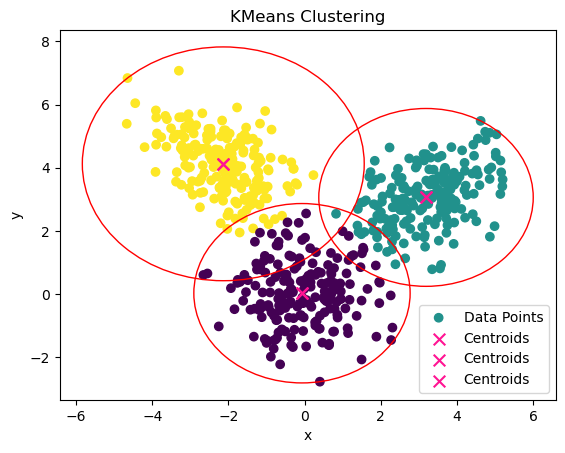

In [7]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

****************************************************
This method with k=3 match the underlying distribution very well. we could see that in each test, the algorithm iterate less than 10 times and it shows us how good the clusters match the underlying distribution.Actually, K-means clustering using the least squares error (LSE) method usually works fine when the sets of data are shaped like spheres and have similar spreads. If the sets are well-separated, K-means is good at finding separate groups.

Advantages of K-means (LSE) approach method:

- We can show the result very easy and understandable

- It is also simple and efficient to implement and it works very well with large number of data points

- K-means can be applied to various types of data and is not restricted to a particular type of distribution. It can handle numerical and categorical data.

Disadvantages of K-means (LSE) approach method:

- K-means uses hard assignments, meaning each data point is assigned to only one cluster. This may not accurately represent the inherent uncertainty in some real-world datasets.

- K-means is sensitive to the initial placement of cluster centroids. Different starting points may lead to different final cluster assignments.

- K-means assumes that clusters are spherical and equally sized. It may not perform well when dealing with clusters of different shapes, sizes, or densities.

****************************************************

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

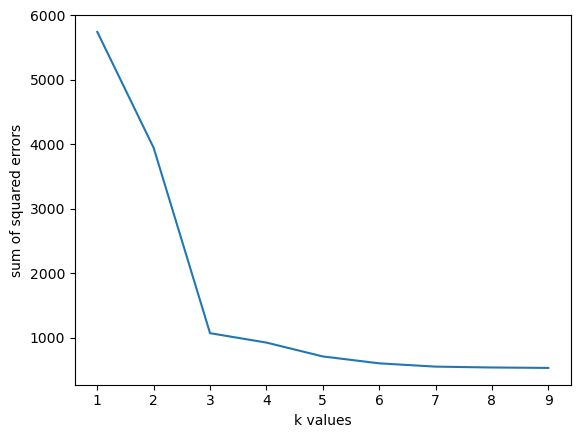

In [8]:
def elbow_method(X, K_list):
    n,d = X.shape
    S = []
    for k in K_list : 
        M, U = kmeans(X , k)
        LSE = 0
        for i in range(n) :
            err = np.square(findErrorTwoPoint(M[ U[i] ,:], data[i,:]))
            LSE += err

            
        S.append(LSE)
        
    return S

K_list = [i for i in range(1,10)]

LSE = elbow_method(data , K_list)

plt.plot(K_list , LSE)
plt.xlabel("k values")
plt.ylabel("sum of squared errors")
plt.show()

****************************************************
The best K value is 3, just as we wanted(since that we know the points belong to 3 different distributions) and this is the reason : 

At the beginning, when we increase K, each group becomes smaller, and the data points get closer to their respective centers. This makes the sum of squared distances (SSE) decrease because the distances between data points and their assigned centers decrease. However, as we keep increasing K, the improvement in SSE becomes less noticeable. The SSE decrease might start to slow down or plateau.

The point where this plateauing happens is called the "elbow" point. The elbow point represents a balance between having a lower SSE (which tends to decrease as K increases) and the complexity of the model (the number of clusters).

After the elbow point, adding more clusters might not significantly decrease the SSE, and the increased complexity of the model may not be worth the improvement in fitting the data. The optimal number of clusters is often considered to be the K value at the elbow point because it finds a middle ground between keeping the model simple and capturing the structure in the data.
****************************************************

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [3]:
# TODO: First 25 rows of the dataset
df = pd.read_csv("sentiment.csv")
print("First 25 rows:")
print(df.head(25))

First 25 rows:
    PhraseId  SentenceId                                             Phrase  \
0          1           1  A series of escapades demonstrating the adage ...   
1          2           1  A series of escapades demonstrating the adage ...   
2          3           1                                           A series   
3          4           1                                                  A   
4          5           1                                             series   
5          6           1  of escapades demonstrating the adage that what...   
6          7           1                                                 of   
7          8           1  escapades demonstrating the adage that what is...   
8          9           1                                          escapades   
9         10           1  demonstrating the adage that what is good for ...   
10        11           1                            demonstrating the adage   
11        12           1             

In [4]:
# TODO: Last 10 rows of the dataset
print(df.tail(10))

      PhraseId  SentenceId                                             Phrase  \
9990      9991         419                     this a comedy or serious drama   
9991      9992         419                          a comedy or serious drama   
9992      9993         419                                        a comedy or   
9993      9994         419                                           a comedy   
9994      9995         419                                      serious drama   
9995      9996         420  plays like some corny television production fr...   
9996      9997         420                   plays like some corny television   
9997      9998         420                         like some corny television   
9998      9999         420                              some corny television   
9999     10000         420                                   corny television   

      Sentiment  
9990          2  
9991          2  
9992          2  
9993          2  
9994          2  


In [5]:
# TODO: information of columns 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10000 non-null  int64 
 1   SentenceId  10000 non-null  int64 
 2   Phrase      10000 non-null  object
 3   Sentiment   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB
None


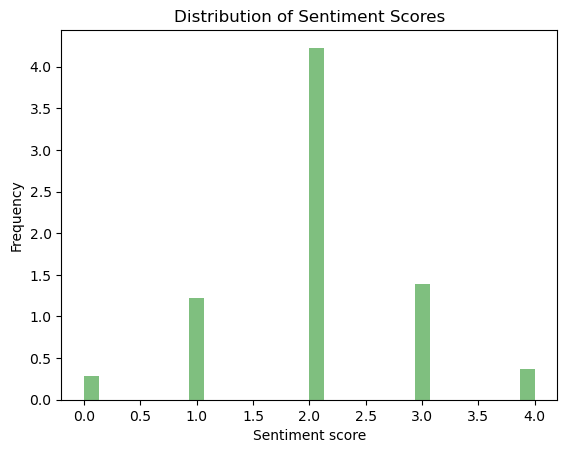

In [43]:
# TODO: histogram of sentiment scores

num_bins = 30
x = df['Sentiment']
n, bins, patches = plt.hist(x, num_bins,
                            density=1,
                            color ='green',
                            alpha = 0.5 )
plt.ylabel('Frequency')
plt.xlabel('Sentiment score')
plt.title('Distribution of Sentiment Scores')
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [7]:
#nltk.download('stopwords')
#nltk.download('punkt')

def preprocess_text(text):
    
    # list of stop words
    stop_words = set(stopwords.words('english'))
 
    # To lowercase and after that for removing punctuation
    ans = text.lower()
    ans = re.sub(r'[^\w\s]', '', ans)

    
    tokens = word_tokenize(ans)
    
    
    filtered_tokens = []
    for word in tokens:
        if word not in stop_words:
            filtered_tokens.append(word)
            
            
    text = ' '.join(filtered_tokens)
    
    return text

In [8]:
# TODO: Apply the preprocessing function to the text column


#this cell is for testing the function 
x = df['Phrase']
n=5 

for i in range(n) : 
    y = preprocess_text(x[i])
    print("before : " , x[i])
    print("after : " , y)

    

before :  A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
after :  series escapades demonstrating adage good goose also good gander occasionally amuses none amounts much story
before :  A series of escapades demonstrating the adage that what is good for the goose
after :  series escapades demonstrating adage good goose
before :  A series
after :  series
before :  A
after :  
before :  series
after :  series


In [42]:
# TODO: Apply the preprocessing function to the text column

x = df['Phrase']
n=5 
y = []
for i in x : 
    y.append(preprocess_text(i))
    
df['Preprocessed_phrase'] = y
print(df.head())

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment                                Preprocessed_phrase  \
0          1  series escapades demonstrating adage good goos...   
1          2    series escapades demonstrating adage good goose   
2          2                                             series   
3          2                                                      
4          2                                             series   

                             new_Preprocessed_phrase  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0,

### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

The "Bag-of-Words" (BoW) technique is a text representation method in natural language processing (NLP). It represents a document as an unordered set of words, disregarding grammar and word order but keeping track of word frequency. This creates a "bag" of words, where each word contributes to the overall content.

In Python, the "CountVectorizer" class from the sklearn.feature_extraction.text module is commonly used to implement the Bag-of-Words technique. 
how the algorithm works : 
- 1)Tokenization: The first step is to break down the text into individual words or tokens.
     - python func : from 'nltk' library functinon "word_tokenize"

- 2)Vocabulary Building: Create a vocabulary, which is a unique set of all the words present in the entire corpus (collection of documents).
     - python func : from 'sklearn.feature_extraction.text' library class "CountVectorizer"

- 3)Vectorization: Represent each document in the corpus as a vector, where each element of the vector corresponds to the frequency of a word from the vocabulary in that document.
     - python func : like 2, class "CountVectorizer" will be used 

- 4)Sparse Matrix Representation: Since most documents use only a small subset of the entire vocabulary, the resulting vectors are often sparse (contain mostly zeros). 



## <font color="red"> TODO : discuss BoW method </font>

...

In [21]:
# TODO: Extract features from the preprocessed text data
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['Preprocessed_phrase'].tolist())
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print(bow_df)

      10  100  100minute  10thgrade  1915  1950s  1970s  1972  1990  2002  \
0      0    0          0          0     0      0      0     0     0     0   
1      0    0          0          0     0      0      0     0     0     0   
2      0    0          0          0     0      0      0     0     0     0   
3      0    0          0          0     0      0      0     0     0     0   
4      0    0          0          0     0      0      0     0     0     0   
...   ..  ...        ...        ...   ...    ...    ...   ...   ...   ...   
9995   0    0          0          0     0      0      0     0     0     0   
9996   0    0          0          0     0      0      0     0     0     0   
9997   0    0          0          0     0      0      0     0     0     0   
9998   0    0          0          0     0      0      0     0     0     0   
9999   0    0          0          0     0      0      0     0     0     0   

      ...  yelling  yes  yet  york  young  youth  zaza  zhuangzhuang  zinge

### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bow_matrix.toarray(), df['Sentiment'], test_size=0.05, random_state=45)

# Initialize and train a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linear_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print('Mean Squared Error on the test data:', mse)

Mean Squared Error on the test data: 0.40262722170128074


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

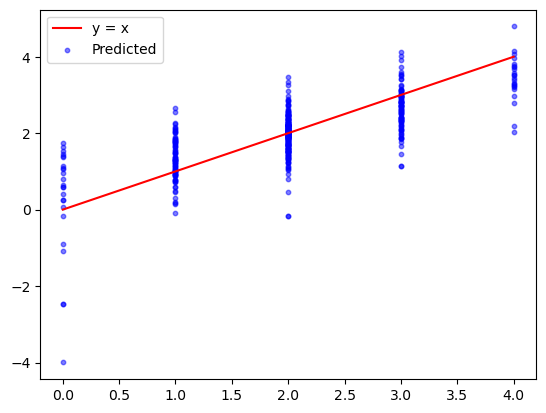

In [24]:
x = np.linspace(0, 4, 100)
y = x
plt.plot(x,y , label='y = x', color='red')

plt.scatter(y_test, y_pred, s=10, color='b', label='Predicted' , alpha=0.5)

plt.legend(()
plt.show()

## <font color="red"> Discuss the resulted figure </font>

Based on the plotted graph, it is evident that the provided estimation tends to predict a value close to 1 for instances where the actual value should be 0. In cases where the true value is 1, the prediction is reasonably accurate, albeit with a slight error. The model performs well on average when the expected value is 2, closely matching the true value. However, when dealing with data that should correspond to 3, the predictions consistently fall slightly below 3, indicating a small error. Notably, for instances where the expected value is 4, the errors are more pronounced, and the average prediction tends to approach 3.As a result, this method for estimating actual data equal to 0 and 4 has more error than actual data equal to 2.


In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [45]:
dictionary = np.array([])
all_phrase = df['Preprocessed_phrase'].tolist()
for i in range(len(all_phrase)):
    dictionary = np.append(dictionary,all_phrase[i].split())
dictionary = set(dictionary)

new_preprocessing_phrase_vectors = [[1 if word in Phrase else 0 for word in dictionary] for Phrase in all_phrase]
df['new_Preprocessed_phrase'] = new_preprocessing_phrase_vectors

print("number of words :",str(len(words)))
print("shape of new vector :",np.shape(new_preprocessing_phrase_vectors))
print(df.head)

number of words : 2451
shape of new vector : (10000, 2451)
<bound method NDFrame.head of       PhraseId  SentenceId                                             Phrase  \
0            1           1  A series of escapades demonstrating the adage ...   
1            2           1  A series of escapades demonstrating the adage ...   
2            3           1                                           A series   
3            4           1                                                  A   
4            5           1                                             series   
...        ...         ...                                                ...   
9995      9996         420  plays like some corny television production fr...   
9996      9997         420                   plays like some corny television   
9997      9998         420                         like some corny television   
9998      9999         420                              some corny television   
9999     10000      